In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neural_network import *
from sklearn.metrics import *
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)
import seaborn as sns
from ipynb.fs.full.Performance_Utilities import calculate_optimal_threshold, print_metrics
from utils.create_features_utils import *
from sklearn.base import clone
import os

In [2]:
tennis_file = "data/grass_matches_with_feature.csv"
raw_tennis_file = "data/mens/combined_raw_data.csv"
round_16_file = "data/wimbledon_2019.csv"

In [3]:
grass_tennis = pd.read_csv(tennis_file) # All grass court results from all years
list(grass_tennis.columns)
round_16 = pd.read_csv(round_16_file) # Round of 16 and on from Wimbledon 2019
raw_tennis = pd.read_csv(raw_tennis_file) # Raw tennis file

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_grass',
 'diff_games_win_percent_grass',
 'diff_5_set_match_win_percent_grass',
 'diff_close_sets_percent_grass',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_grass_60',
 'diff_games_win_percent_grass_60',
 'diff_5_set_match_win_percent_grass_60',
 'diff_close_sets_percent_grass_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_grass_hh',
 'diff_games_win_percent_grass_hh']

In [5]:
grass_tennis = grass_tennis.dropna()

grass_tennis['diff_rank'] = grass_tennis['player_0_rank'] - grass_tennis['player_1_rank']

In [6]:
# Train-test split
y = grass_tennis.outcome
X = grass_tennis[features_list]
print(np.shape(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True, test_size=0.20)

(2847, 21)


In [7]:
# Final to predict on
round_16['Date'] = '2019/07/07'
round_16['Surface'] = 'Grass'
round_16['diff_rank'] = round_16['player_0_rank'] - round_16['player_1_rank']

wimby_2019 = create_features(round_16, raw_tennis) # Round 16 and on Wimby 2019
X_wimby_2019 = wimby_2019[features_list]

Creating Player Career Stats All Surface
Creating Player Career Stats on Grass/Clay/Hard
Creating Player Career Stats All Surface Last 52 Weeks
Creating Player Career Stats on Grass/Clay/Hard Last 60 Weeks
Creating Player Head to Head Career Stats All Surface
Creating Player Head to Head Career Stats On Grass
Creating Difference Variables


In [8]:
nn = MLPClassifier(activation='logistic', hidden_layer_sizes = (10,))
nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,Model,Accuracy,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Sensitivity,Specificity,AUC,F1-Score,Geometric Mean,Kappa-Statistics,Sklearn Version
0,NN,0.693,0.272,0.915,0.085,0.728,0.272,0.915,0.688,0.381,0.499,0.217,0.22


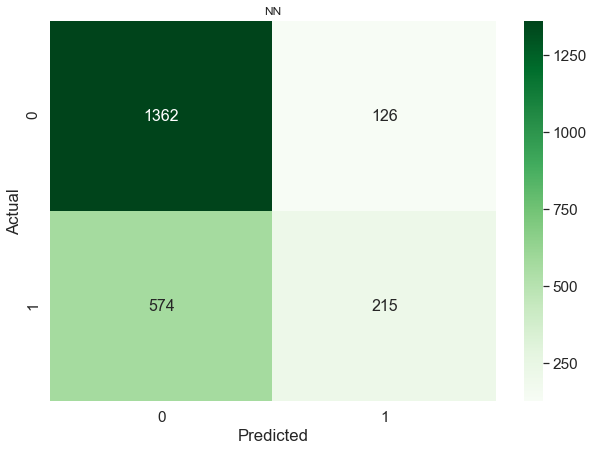

In [9]:
print_metrics(X_train, y_train, nn, "NN")[1]

[(1e-05, 5), (1e-05, 7), (1e-05, 10), (1e-05, 15), (1e-05, 20), (0.0001, 5), (0.0001, 7), (0.0001, 10), (0.0001, 15), (0.0001, 20), (0.001, 5), (0.001, 7), (0.001, 10), (0.001, 15), (0.001, 20)]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http

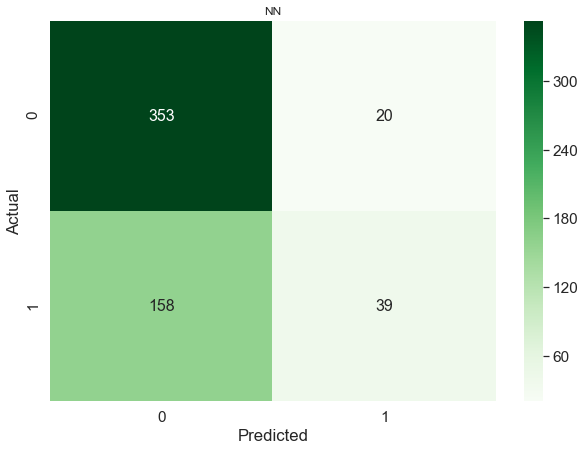

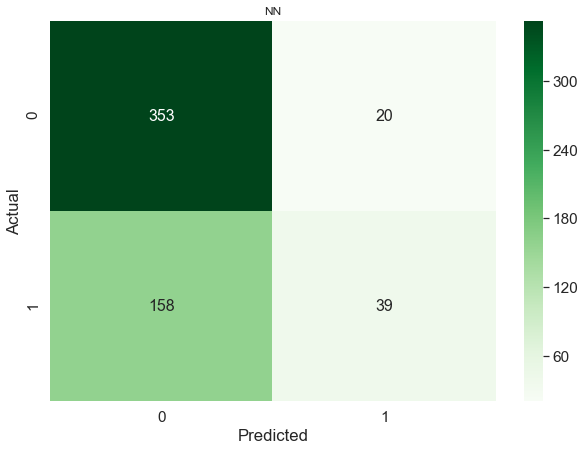

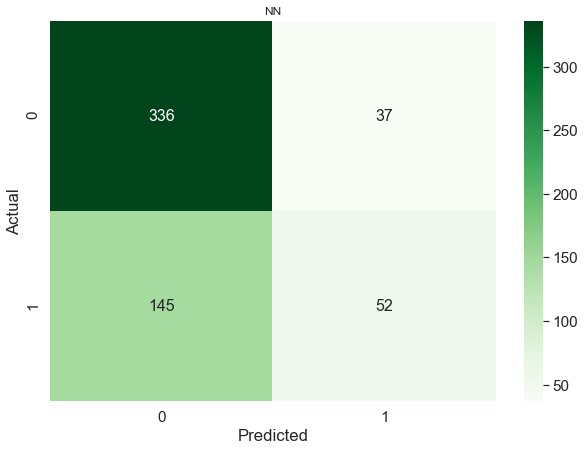

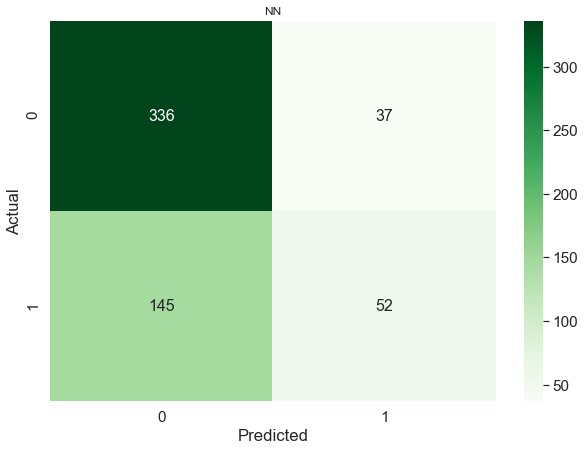

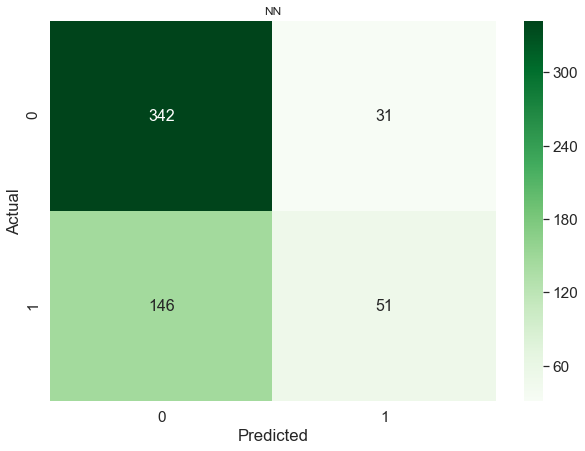

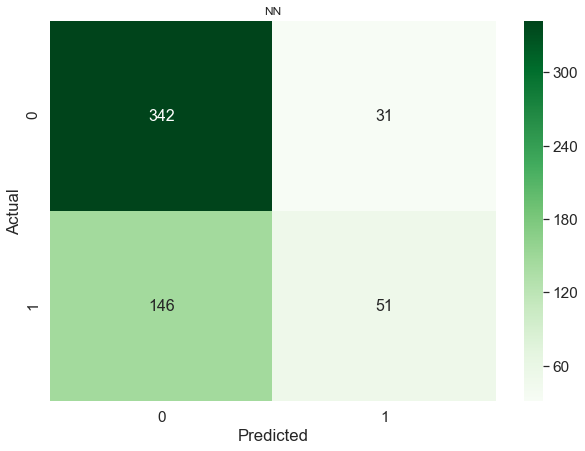

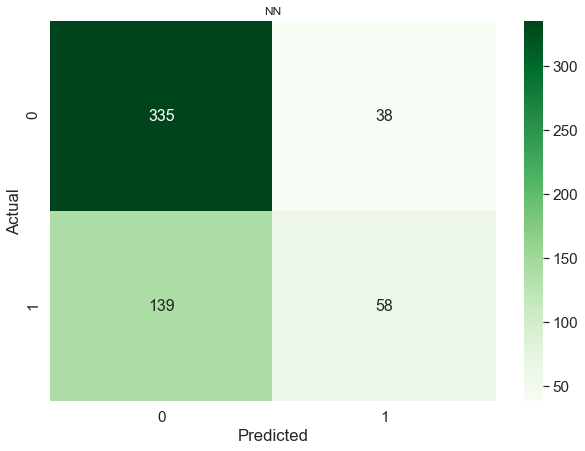

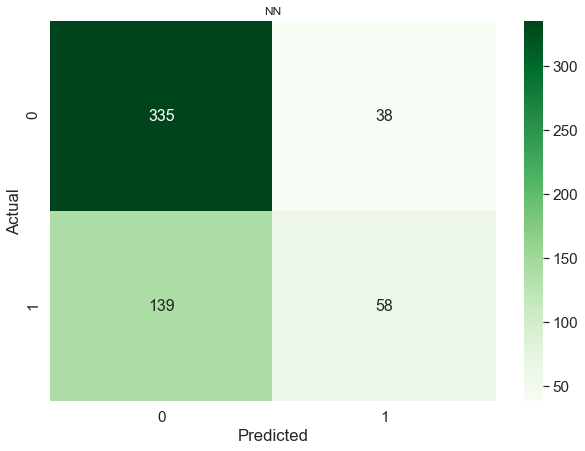

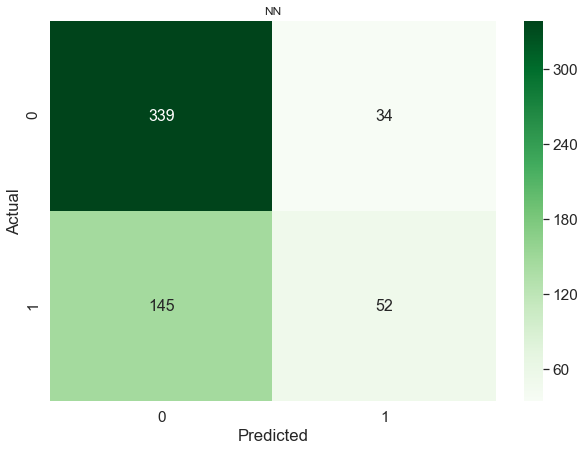

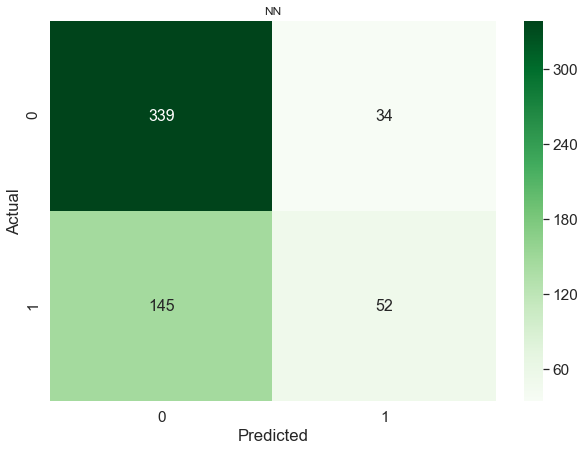

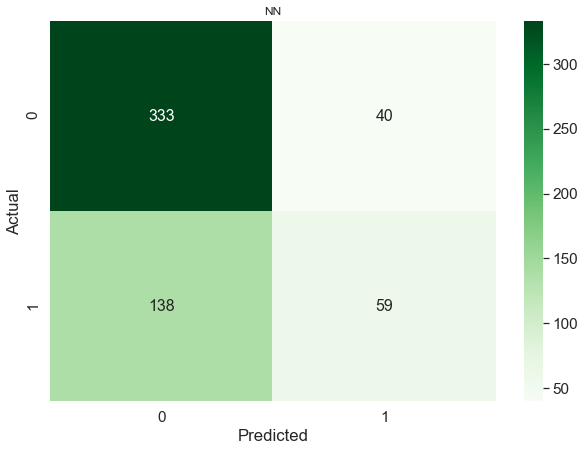

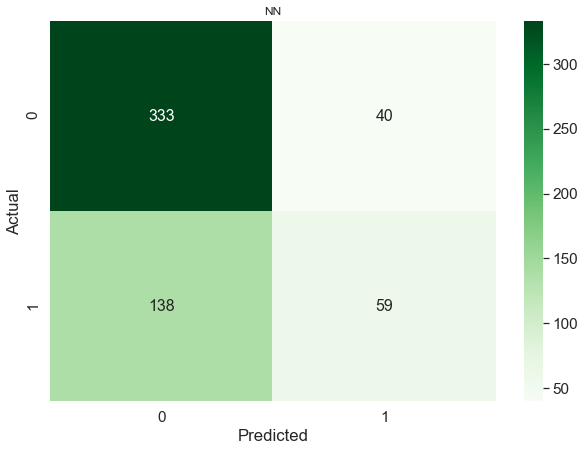

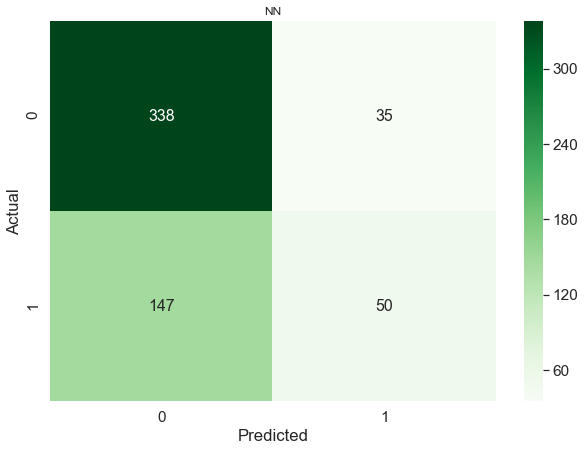

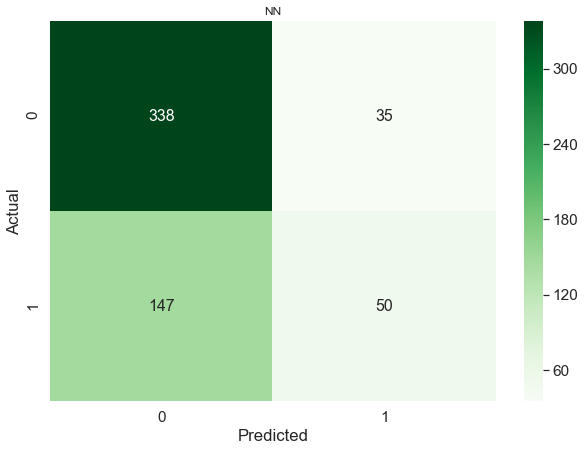

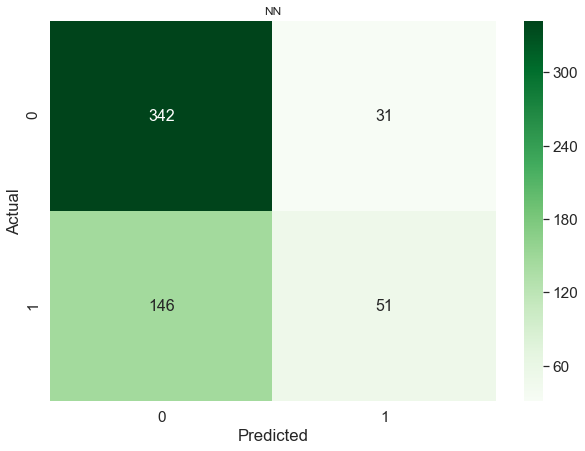

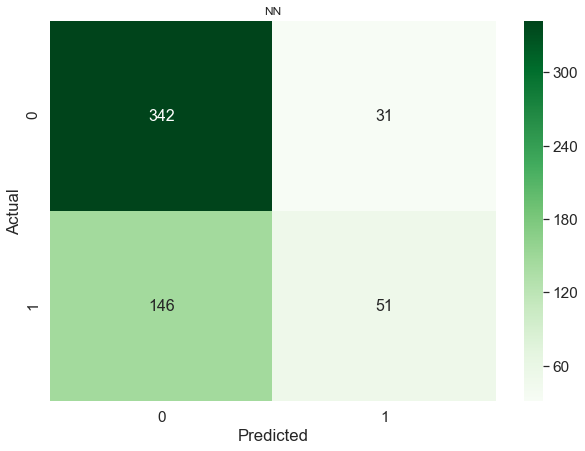

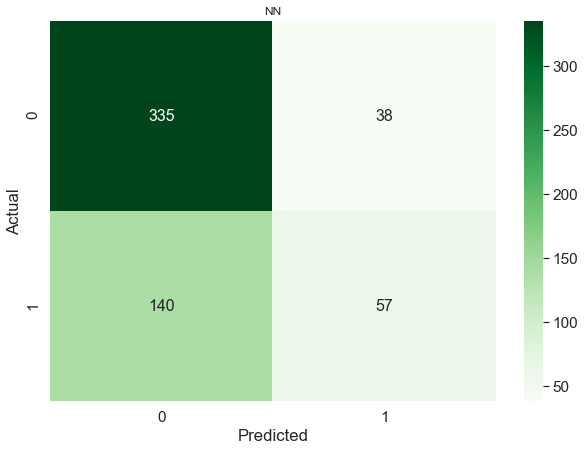

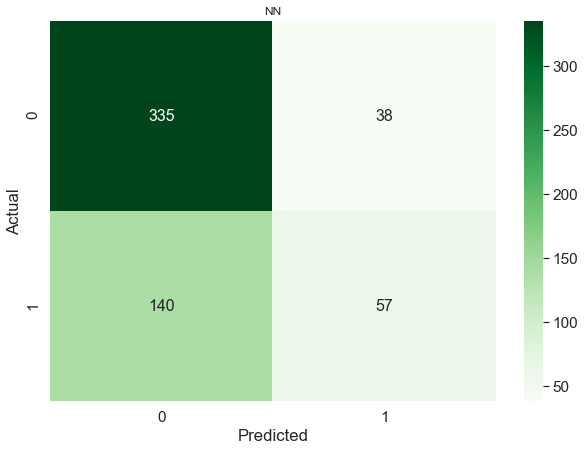

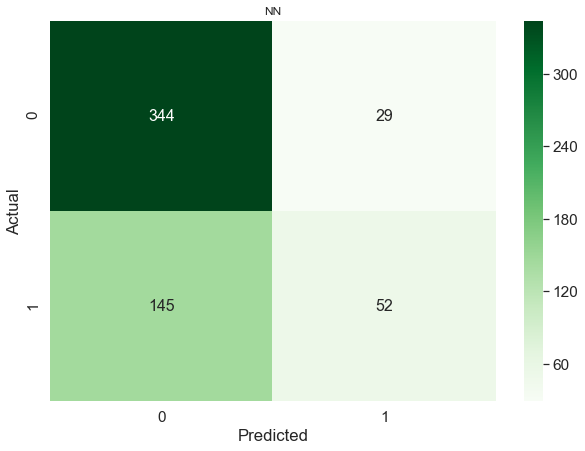

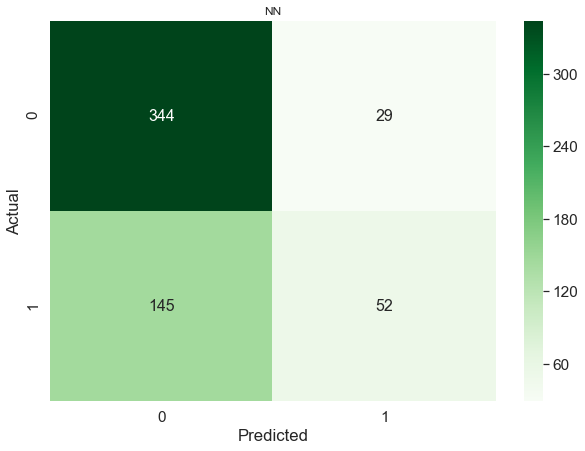

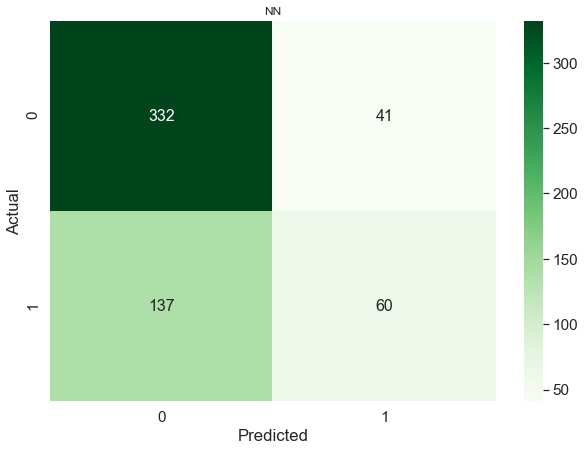

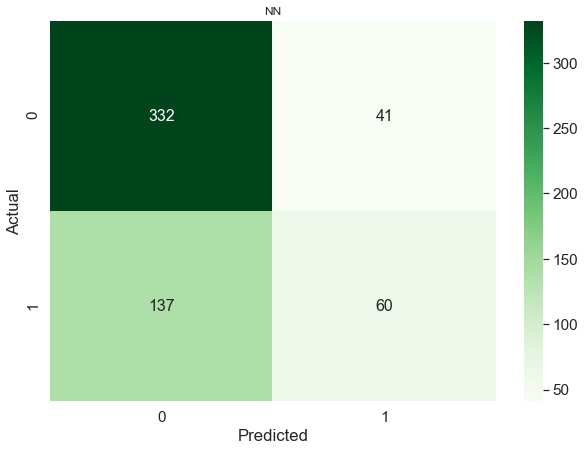

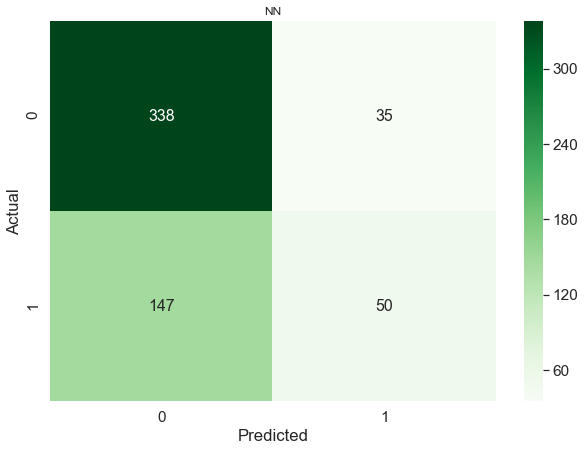

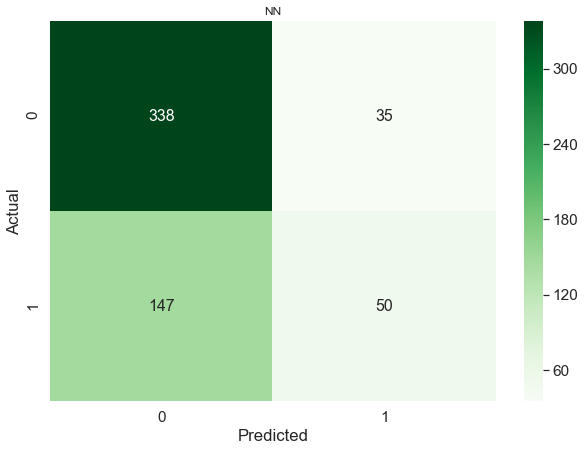

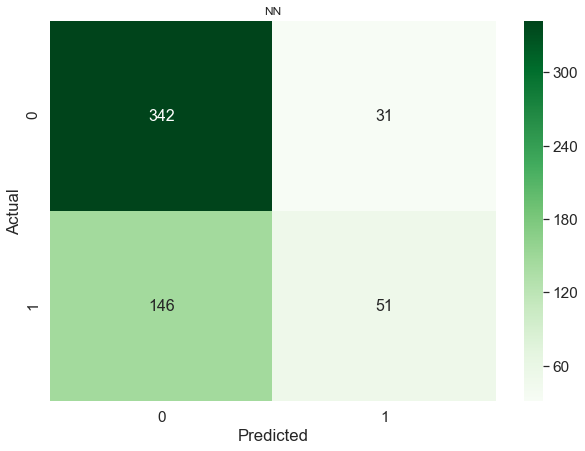

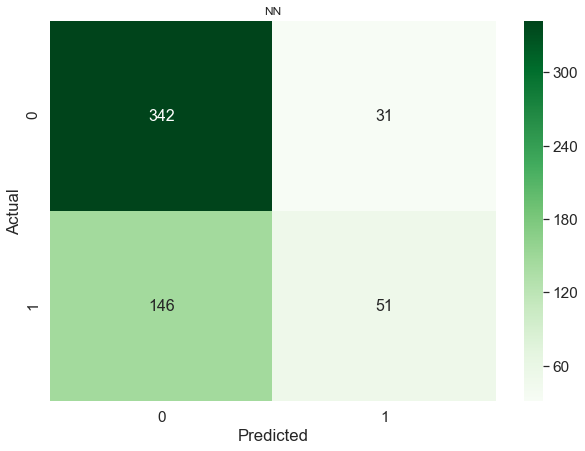

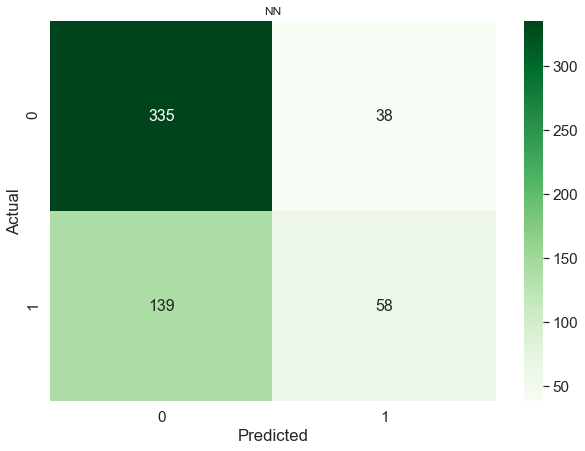

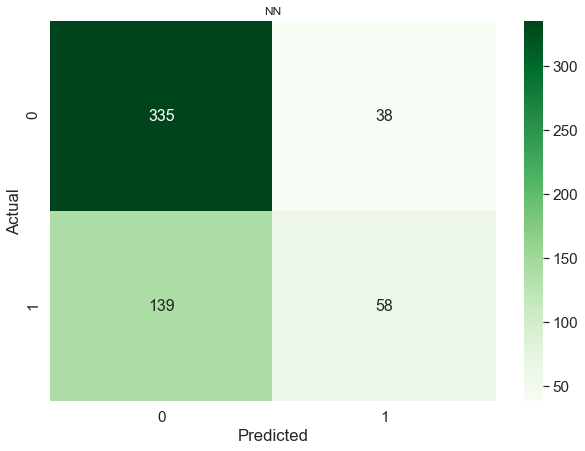

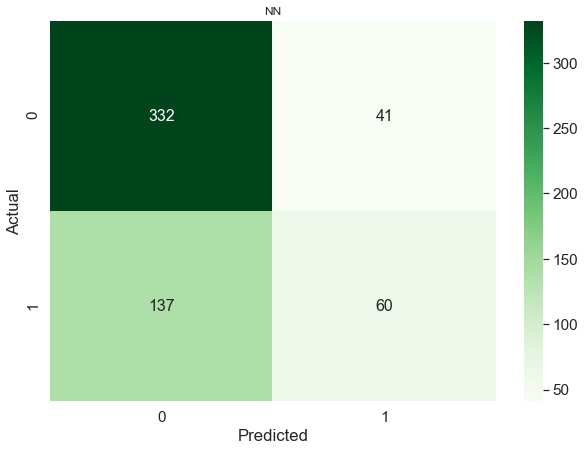

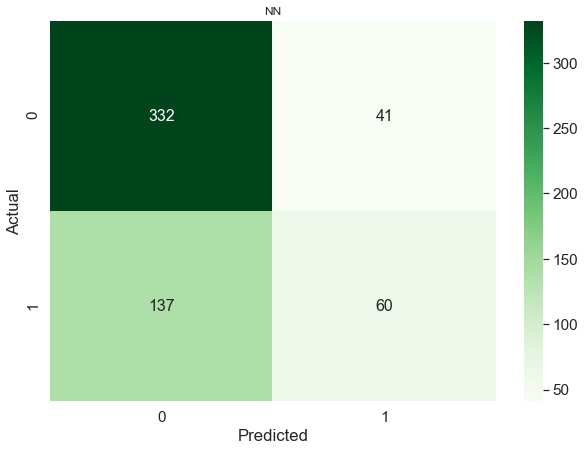

In [17]:
alpha = [.00001, .0001, .001]
hidden_layer_sizes = [5, 7, 10, 15, 20]
params = [(x, y) for x in alpha for y in hidden_layer_sizes]
print(params)
auc_ls = []
f1_ls = []

for i in params:
    nn = MLPClassifier(alpha = i[0], activation='relu', hidden_layer_sizes = i[1], random_state = 456)
    nn.fit(X_train, y_train)
    auc = print_metrics(X_test, y_test, nn, "NN")[2]
    f1 = print_metrics(X_test, y_test, nn, "NN")[3]
    auc_ls.append(auc)
    f1_ls.append(f1)  

In [18]:
print(auc_ls)
print(f1_ls)

[0.675, 0.672, 0.678, 0.674, 0.679, 0.66, 0.673, 0.678, 0.673, 0.68, 0.661, 0.673, 0.678, 0.672, 0.661]
[0.305, 0.364, 0.366, 0.396, 0.367, 0.399, 0.355, 0.366, 0.39, 0.374, 0.403, 0.355, 0.366, 0.396, 0.403]


In [19]:
scale_auc_ls = (auc_ls - min(auc_ls))*100
print(scale_auc_ls)
scale_f1_ls = (f1_ls - min(f1_ls))*10
print(scale_f1_ls)

[1.5 1.2 1.8 1.4 1.9 0.  1.3 1.8 1.3 2.  0.1 1.3 1.8 1.2 0.1]
[0.   0.59 0.61 0.91 0.62 0.94 0.5  0.61 0.85 0.69 0.98 0.5  0.61 0.91
 0.98]


[2.5 2.2 2.8 2.4 2.9 1.  2.3 2.8 2.3 3.  1.1 2.3 2.8 2.2 1.1]
[0.1  0.69 0.71 1.01 0.72 1.04 0.6  0.71 0.95 0.79 1.08 0.6  0.71 1.01
 1.08]


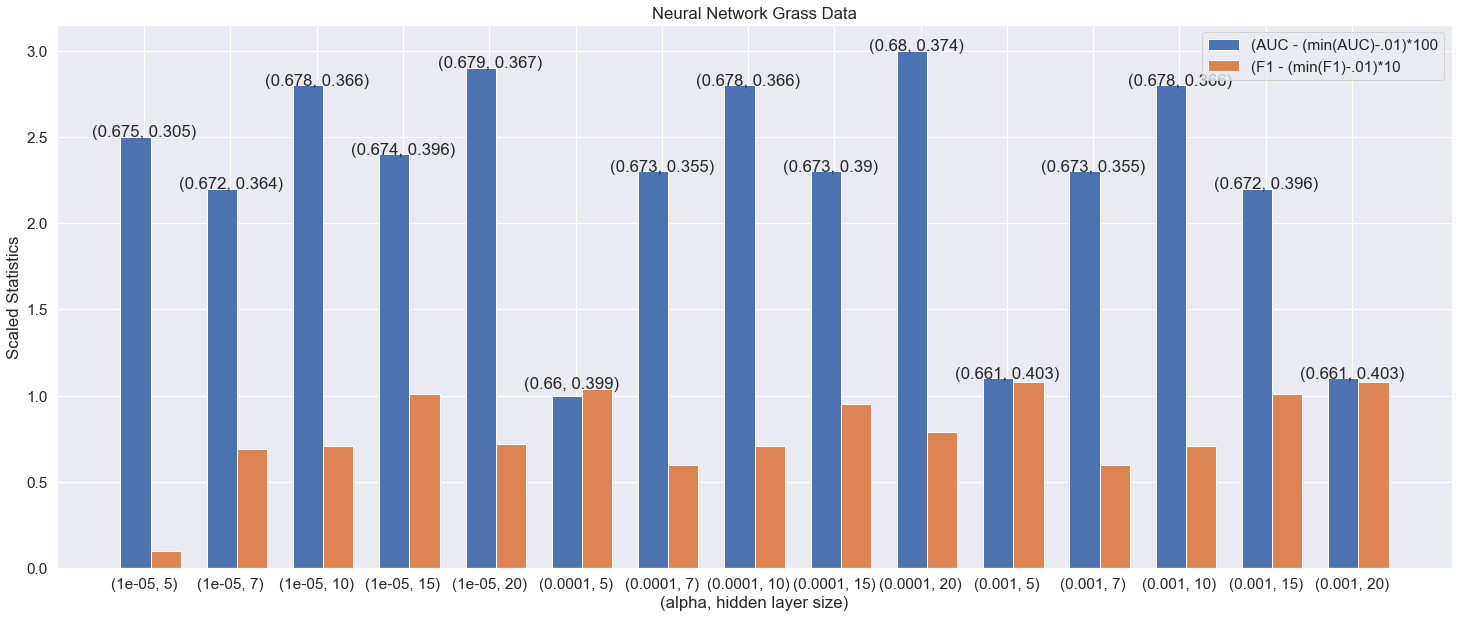

In [20]:
# Scale for plot
scale_auc_ls = (auc_ls - (min(auc_ls)-.01))*100
print(scale_auc_ls)
scale_f1_ls = (f1_ls - (min(f1_ls)-.01))*10
print(scale_f1_ls)

# Plot
n_combos = len(params)
index = np.arange(n_combos)
axes = plt.gca()
bar_width = .35


aucs = plt.bar(index, scale_auc_ls, bar_width, label = "(AUC - (min(AUC)-.01)*100")
f1s = plt.bar(index+bar_width, scale_f1_ls, bar_width, label = "(F1 - (min(F1)-.01)*10")

plt.xticks(index+.1, params)
for i, v in enumerate(scale_auc_ls):
    plt.text(i - .5, max(scale_auc_ls[i], scale_f1_ls[i]), str((auc_ls[i], f1_ls[i])))

plt.xlabel("(alpha, hidden layer size)")
plt.ylabel("Scaled Statistics")
plt.title("Neural Network Grass Data")
plt.legend()

In [14]:
nn.predict_proba(X_wimby_2019)

array([[0.87723577, 0.12276423],
       [0.55604045, 0.44395955],
       [0.68887067, 0.31112933],
       [0.69852443, 0.30147557],
       [0.79443708, 0.20556292],
       [0.89266536, 0.10733464],
       [0.80670438, 0.19329562],
       [0.73440078, 0.26559922],
       [0.75761851, 0.24238149],
       [0.57771251, 0.42228749],
       [0.76759538, 0.23240462],
       [0.69057242, 0.30942758],
       [0.65672926, 0.34327074],
       [0.57646059, 0.42353941],
       [0.53221679, 0.46778321],
       [0.64601743, 0.35398257]])